# Sampling from specified functions.
## Joseph Palmer: jpalmer18@imperial.ac.uk
### Royal Holloway University of London
### Imperial College London
### May 2019
---

The method to sample from a function is as follows:

First sample from a uniform distribution bound from 0 to 1.
Pass the numbers into the inverse of the CDF of the target distribution.
The output numbers satisfy the distribution of the original function.

The following example uses an exponential distribution:

$f(x) = \lambda e^{-\lambda x}$. 

The cumulative density function is:

$P(x) = 1 - e^{-\lambda x}$.

The Inverse of this is:

$P(x)^{-1} = -\frac{1}{\lambda} \ln{u}$, where $u$ is a uniform random quantity.

These steps will need to be repeated for each function you want to test. 

__Resources:__ 

http://www.mas.ncl.ac.uk/~ndjw1/teaching/sim/transf/exp.html
https://sciencehouse.wordpress.com/2015/06/20/sampling-from-a-probability-distribution/
https://blogs.sas.com/content/iml/2013/07/22/the-inverse-cdf-method.html
https://www.symbolab.com/solver/function-inverse-https://www.wolframalpha.com/widgets/view.jsp?id=d08726019e4a2a15cb1d49092e4d0522

In [1]:
# Imports
import pandas as pd
import numpy as np
from mletools import runmle
import mletools
import matplotlib.pyplot as plt

In [2]:
# testing function - inverse cdf of exponential (see 1st item in resource list) -
def InvExpCDF(params, x):
    rate = 1 / params[0]
    return (-1/rate) * np.log(x)


Provided rate   = 1.8
Analytical rate = 1.8176560728347813
simulated  rate = 1.817656107839719

Model Output

      fun: 402.4522010000452
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 20
      nit: 8
   status: 0
  success: True
        x: array([1.81765611])

Plot


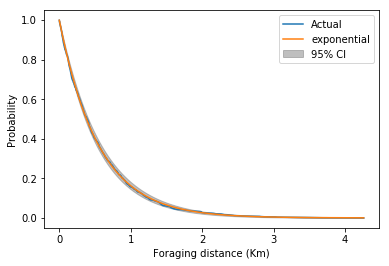

In [3]:
# sample from uniform distribution to input into function
n = 1000
sample = np.random.uniform(0, 1, n)
p = 1.8
newdata = InvExpCDF([1/p], sample)

# run the model and generate plots
mod = runmle(data = newdata, startest = [0.1], method = "exponential")
model = mod.ModelData()
pred = mod.MLEPredict(model)
cis = mod.Getci2p(model)
pred2 = mod.MLEPredictCI(cis, pred)
fig = mod.PredictFig(pred2)

# display results and check
print("Provided rate   = {}\n"
      "Analytical rate = {}\n"
      "simulated  rate = {}\n\n"
      "Model Output\n\n{}\n\nPlot".format(p, n/sum(newdata), model.x[0], model))

In [4]:
# testing function - inverse cdf of sumexp
def InvSumExpCDF(params, x):
    r1 = params[0]
    r2 = params[1]
    r3 = params[2]
    p1 = params[3]
    p2 = params[4]
    e1 = (p1 + np.exp(p2)) / (np.exp(r3) + r2 * p2 - np.exp(r3) * p2 + np.exp(r1) * x - np.exp(r3) * x)
    e2 = (p1 + np.exp(p2)) / (np.exp(r3) + r2 * p2 - np.exp(r3*p2) + np.exp(r1*x) - np.exp(r3*x))
    return e2


In [15]:
# get the correct file
import sys
sys.path.insert(0, "/home/joe/Documents/CMEE/mletools") 
import mlemodel

path = "../../Data/Distances.csv"
data = pd.read_csv(path)

# subset the data by locations
rural_dist = data["Distance_Km"][data["Location"] == "ROT"]
urban_dist = data["Distance_Km"][data["Location"] == "ZSL"]

# sample from uniform distribution to input into function
n = 1000
sample = np.random.uniform(0, 1, n)

r1 = 1
r2 = 2
r3 = 3
p1 = 0.2
p2 = 0.3
params = [r1, r2, r3, p1, p2]

newdata = InvExpCDF(params, sample)

#newdata = rural_dist

# run the model and generate plots

l = 3
rates = [0.1] * l 
param = [i for i in np.random.uniform(0, 1, l - 1)]
print(sum(param))
start = [rates, param]
bounds = (((0, None),) * l) + (((0, 1),) * (l - 1))
mod = mlemodel.runmle(data = newdata,
                      startest = start,
                      bounds = bounds,
                      method = "sumexp")
model = mod.ModelDataSE()
pred = mod.MLEPredict(model)
#cis = mod.Getci2p(model)
#pred2 = mod.MLEPredictCI(cis, pred)
fig = mod.PredictFig(pred, ci = False)
print(model)

0.9584094684638108
[0.1        0.1        0.1        0.23863359 0.71977588]
[0.10000001 0.1        0.1        0.23863359 0.71977588]
[0.1        0.10000001 0.1        0.23863359 0.71977588]
[0.1        0.1        0.10000001 0.23863359 0.71977588]
[0.1        0.1        0.1        0.2386336  0.71977588]
[0.1        0.1        0.1        0.23863359 0.71977589]
[nan nan nan nan nan]


NameError: name 'nan' is not defined